## Group3 - Replication_1
#### Members
1. Andrea Ulloa (20172597)
2. Ana Angulo (20171627)
3. Angela Coapaza (20171636) 



# Data

We consider the same subsample of the U.S. Current Population Survey (2015). Let us load the data set.

***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

In [1]:
pip install pyreadr 

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Extracting the data
total_data  = pd.read_csv(r'../../data/wage2015_subsample_inference.csv')
total_data['occ']=pd.Categorical(total_data.occ)
total_data['occ2']=pd.Categorical(total_data.occ2)
total_data['ind']=pd.Categorical(total_data.ind)
total_data['ind2']=pd.Categorical(total_data.ind2)

#Determining the dimension of our data set.
total_data.shape
# There are 5150 obs and 21 features

(5150, 21)

Focus on the subset of college-educated workers (scl, clg variables). Thus, we will filter the observations that are at least one year old or have finished college.

In [3]:
print(total_data['shs'].value_counts()) 
print(total_data['hsg'].value_counts()) 
# In our new base we should have 3068 observations

0.0    5030
1.0     120
Name: shs, dtype: int64
0.0    3894
1.0    1256
Name: hsg, dtype: int64


In [4]:
data = total_data[(total_data['shs'] == 1) | (total_data['hsg'] == 1)]
data

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
2,15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4
6,43,19.230769,2.956512,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,42.0,17.64,74.088,311.1696,5120.0,17,7280.0,14
7,44,19.230769,2.956512,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,37.0,13.69,50.653,187.4161,5240.0,17,5680.0,9
8,47,12.000000,2.484907,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,31.0,9.61,29.791,92.3521,4040.0,13,8590.0,19
10,73,17.307692,2.851151,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,7.0,0.49,0.343,0.2401,4020.0,13,8270.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,32580,12.980769,2.563469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,15.0,2.25,3.375,5.0625,2010.0,6,9370.0,22
5137,32590,13.461538,2.599837,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,8.0,0.64,0.512,0.4096,4720.0,16,8590.0,19
5141,32599,22.596154,3.117780,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,15.0,2.25,3.375,5.0625,9620.0,22,5390.0,9
5142,32603,16.826923,2.822980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,11.0,1.21,1.331,1.4641,7150.0,20,8770.0,21


### Describing the main variables 

Let's go to **describe the main variables** that we will use later to obtain the causal effect of sex on income: 

wage, log-wage, sex, some college, college graduate, avdanced degree, experience

In [5]:
data.describe()
#"lwage","sex","scl","clg","ne","mw","so","we","exp1" - to regression
#"wage, lwage","sex","scl","clg","ne","mw","so","we","exp1" - to describe

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4
count,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.0,1376.0,1376.0,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
mean,15324.329215,17.854354,2.718562,0.321948,0.087209,0.912791,0.0,0.0,0.0,0.286337,0.291424,0.198401,0.223837,17.190044,4.029529,11.434386,36.158301
std,9558.392920,22.153617,0.504167,0.467393,0.282244,0.282244,0.0,0.0,0.0,0.452213,0.454584,0.398941,0.416966,10.369836,4.464939,17.304596,67.243707
min,15.000000,3.365385,1.213542,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500
25%,6968.000000,10.989011,2.396896,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,9.000000,0.810000,0.729000,0.656100
50%,14436.000000,14.615385,2.682075,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,14.000000,1.960000,2.744000,3.841600
75%,23460.500000,20.097115,3.000573,1.000000,0.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,25.000000,6.250000,15.625000,39.062500
max,32631.000000,528.845673,6.270697,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100


In [6]:
#Creando una variable string para los graficos
data['sexo']="female"
data.loc[data[ 'sex' ] == 0,'sexo'] = "male"
data.head()

C:\Users\ANA\AppData\Local\Temp/ipykernel_15812/2382442191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sexo']="female"
C:\Users\ANA\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,sexo
2,15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4,male
6,43,19.230769,2.956512,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,42.0,17.64,74.088,311.1696,5120.0,17,7280.0,14,female
7,44,19.230769,2.956512,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,37.0,13.69,50.653,187.4161,5240.0,17,5680.0,9,male
8,47,12.000000,2.484907,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,31.0,9.61,29.791,92.3521,4040.0,13,8590.0,19,female
10,73,17.307692,2.851151,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,7.0,0.49,0.343,0.2401,4020.0,13,8270.0,18,female


In [7]:
data['place']="South"

data.loc[data[ 'ne' ] == 1,'place'] = "Northeast"
data.loc[data[ 'mw' ] == 1,'place'] = "Midwest"
data.loc[data[ 'we' ] == 1,'place'] = "West"
data

C:\Users\ANA\AppData\Local\Temp/ipykernel_15812/3052232993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['place']="South"
C:\Users\ANA\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,sexo,place
2,15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4,male,Northeast
6,43,19.230769,2.956512,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,42.0,17.64,74.088,311.1696,5120.0,17,7280.0,14,female,Northeast
7,44,19.230769,2.956512,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,37.0,13.69,50.653,187.4161,5240.0,17,5680.0,9,male,Northeast
8,47,12.000000,2.484907,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,31.0,9.61,29.791,92.3521,4040.0,13,8590.0,19,female,Northeast
10,73,17.307692,2.851151,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.0,0.49,0.343,0.2401,4020.0,13,8270.0,18,female,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,32580,12.980769,2.563469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,2.25,3.375,5.0625,2010.0,6,9370.0,22,male,West
5137,32590,13.461538,2.599837,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.64,0.512,0.4096,4720.0,16,8590.0,19,female,West
5141,32599,22.596154,3.117780,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,2.25,3.375,5.0625,9620.0,22,5390.0,9,male,West
5142,32603,16.826923,2.822980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,11.0,1.21,1.331,1.4641,7150.0,20,8770.0,21,male,West


In [8]:
data['shs']="some high school"

data.loc[data[ 'hsg' ] == 0,'educ'] = "High school graduate"
data.head()

C:\Users\ANA\AppData\Local\Temp/ipykernel_15812/552887200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['shs']="some high school"
C:\Users\ANA\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\ANA\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,exp2,exp3,exp4,occ,occ2,ind,ind2,sexo,place,educ
2,15,11.057692,2.403126,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,3.24,5.832,10.4976,6260.0,19,770.0,4,male,Northeast,NaN
6,43,19.230769,2.956512,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,17.64,74.088,311.1696,5120.0,17,7280.0,14,female,Northeast,NaN
7,44,19.230769,2.956512,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,13.69,50.653,187.4161,5240.0,17,5680.0,9,male,Northeast,NaN
8,47,12.000000,2.484907,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,9.61,29.791,92.3521,4040.0,13,8590.0,19,female,Northeast,NaN
10,73,17.307692,2.851151,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,0.49,0.343,0.2401,4020.0,13,8270.0,18,female,Northeast,NaN


In [9]:
#pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



#### Wage and lwage

The following graph shows the hourly wage density. As can be seen, the distribution has a large tail to the right (positive asymmetric distribution), that is, there are unusually high values. While most observations are concentrated in values less than 100.

C:\Users\ANA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wage', ylabel='Density'>

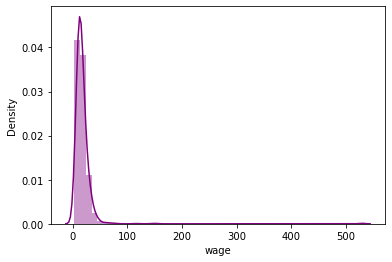

In [10]:
from seaborn import distplot

distplot(data.wage, color='purple')

Due to the problem of outlayers, the variable of the logarithm of wages is created. This corrects the asymmetry presented by the original data.

C:\Users\ANA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lwage', ylabel='Density'>

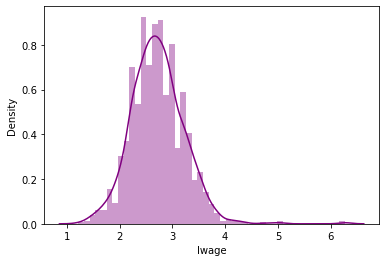

In [11]:
from seaborn import distplot

distplot(data.lwage,color='purple')

#### lwage and sex by grade

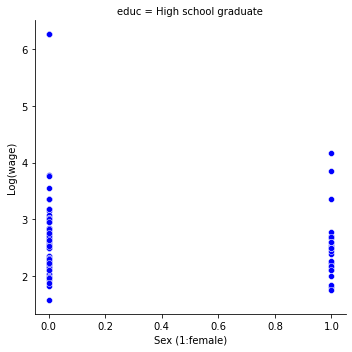

In [12]:
g = sns.relplot(data=data,  x="sex", y="lwage", col="educ", color='blue')
g.set_axis_labels("Sex (1:female)", "Log(wage)")

This graph shows that in the group of university graduates, there are some (few) who earn a higher salary than women. It can also be seen that there is less income variability among women than among men. On the other hand, in the group of some college we observe that there are unusually high observations in both the men's and women's groups, with a man being the one with the highest salary. It's interesting that among the unusual values there are people who have not yet finished university, but have higher incomes than those who did finish university.

Text(0, 0.5, ' ')

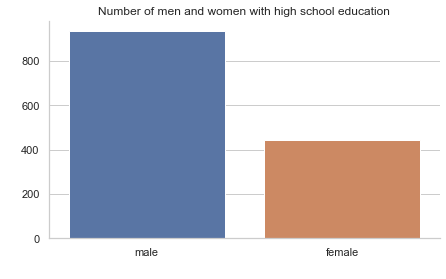

In [13]:
# The numbers of men and women in our sample.

sns.set( style="whitegrid" )


fig, ax = plt.subplots( figsize=(7,4) )

x = sns.countplot( x="sexo", data=data )

sns.despine()
plt.title('Number of men and women with high school education')
plt.xlabel(' ')
plt.ylabel(' ')

As we can see, there are more men with high school degrees than women in our sample of unmarried workers.

In [14]:
# How many women have some college compared to men?
# How many women have completed college compared to men?

data_scl = data[data['shs']==1]
data_clg = data[data['hsg']==1]

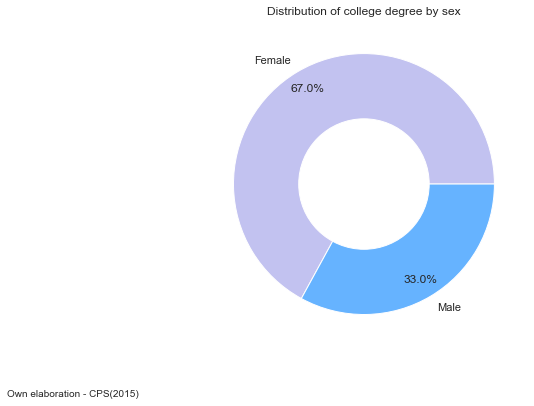

In [15]:
base2 = data_clg.groupby([ 'sex' ]).count()

labels=['Female', 'Male']
plt.figure(figsize=(10, 6))

ax = plt.pie(base2['lwage'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85, colors=['#c2c2f0','#66b3ff'])
  
# centroid size and color

center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
  
plt.title('Distribution of college degree by sex')

# Adding notes

txt="Own elaboration - CPS(2015)"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

plt.show()

In both subsamples we can observe the percentage is always lower than that of men (as happens in the total sample). However, in the college degree group, the representation of women increases.

#### lwage and place of residence

<AxesSubplot:xlabel='place', ylabel='Count'>

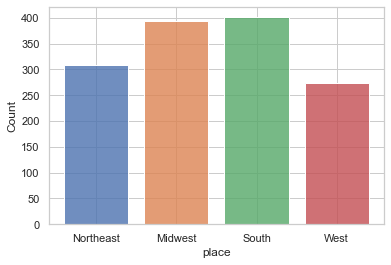

In [16]:
#f, axs = plt.subplots(1, 1, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
#sns.scatterplot(data=data, x="exp1", y="lwage", hue="sexo", ax=axs[0])
sns.histplot(data=data, x="place", hue="place", shrink=.8, alpha=.8, legend=False)
#f.tight_layout()

# The number of college-educated workers is higher in the midwest and south
# where there are fewer is in the west

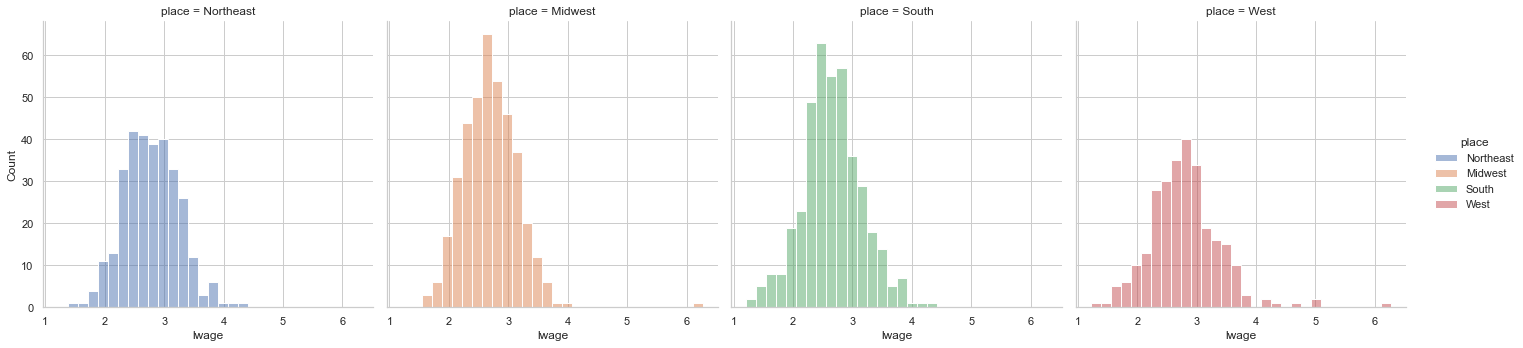

In [17]:
sns.displot(data=data, x="lwage", hue="place", col="place",bins=30)

The previous graph shows the distribution of the logarithm of salaries by place. We can see that the male observation with the highest income lives in the west.

#### Experience, Sex and lwage

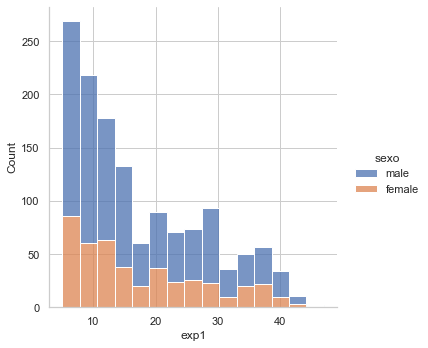

In [18]:
sns.displot(data=data, x="exp1", hue="sexo", multiple="stack")

There is a greater number of people with experience between 0 and 10 years. After 10 years, the population with a lot of experience is reduced. It can be seen that both women and men are roughly equally represented in each experience group, but it seems that generally men slightly outnumber women.

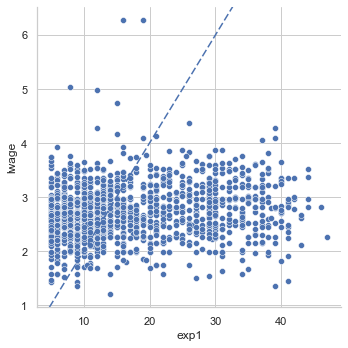

In [19]:
# This 
g = sns.relplot(data=data, x="exp1", y="lwage")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

This scatter plot does not tell us much about the relationship between experience and salary. We can see that the relationship is positive within this college-educated group, but that relationship is basically made up of unusual observations. It is interesting that for those between 10 and 30 years old, the relationship of more experience plus salary per hour is fulfilled, but after 30 years of experience, salaries are reduced.

In [20]:
#base = data_scl.groupby([ 'sexo' ]).count()
#base

In [21]:
# plot pie

#base = data_scl.groupby('sexo').size()

#base.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f %%', colors= ['#c2c2f0','#66b3ff'])
#plt.title("Distribución de los some college por sexo")
#plt.ylabel("")
#plt.show()



In [22]:
# hacer un scatter plot con años de experiencia e ingresos


# Prediction

### An Inferencial Problem: The College-Educated Wage Gap
Using the data from the March Supplement of the U.S. Current Population Survey (2015) , in  this lab, we are going to focus in  payments of the college-educated workers and answer the following inference question:

What is the difference in predicted wages between workers with some high school education (shs) versus high school graduate workers(clg)?

To predict the High School-Educated Wage Gap, we consider the following log-linear regression model:

\begin{align}
\log(Y) &= \beta'X + \epsilon\\
\end{align}

With this, we will:

- Predict wages using various characteristics of workers.

- Assess the predictive performance using the (adjusted) sample MSE, the (adjusted) sample $R^2$. the out-of-sample MSE and $R^2$


We employ two different specifications for prediction:

1. Basic Model:  consists of a set of raw regressors (e.g. gender, experience, education indicators, occupation and industry indicators, regional indicators). That is, $sex + exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2$.
2. Flexible Model:  consists of all raw regressors from the basic model (excepto for sex) plus transformations  squared. That is $(exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2$

In [23]:
# Import packages for OLS regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
Y = np.log2(data['wage']) 
n = len(Y)
z = data.loc[:, ~data.columns.isin(['wage', 'lwage','Unnamed: 0'])]
z  

,rownames,sex,shs,hsg,scl,clg,ad,mw,so,we,...,exp2,exp3,exp4,occ,occ2,ind,ind2,sexo,place,educ
2,15,0.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.24,5.832,10.4976,6260.0,19,770.0,4,male,Northeast,NaN
6,43,1.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.64,74.088,311.1696,5120.0,17,7280.0,14,female,Northeast,NaN
7,44,0.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.69,50.653,187.4161,5240.0,17,5680.0,9,male,Northeast,NaN
8,47,1.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.61,29.791,92.3521,4040.0,13,8590.0,19,female,Northeast,NaN
10,73,1.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.49,0.343,0.2401,4020.0,13,8270.0,18,female,Northeast,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,32580,0.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.25,3.375,5.0625,2010.0,6,9370.0,22,male,West,NaN
5137,32590,1.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.64,0.512,0.4096,4720.0,16,8590.0,19,female,West,NaN
5141,32599,0.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.25,3.375,5.0625,9620.0,22,5390.0,9,male,West,NaN
5142,32603,0.0,some high school,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.21,1.331,1.4641,7150.0,20,8770.0,21,male,West,NaN


In [25]:
p = z.shape[1] #number of regressors

print("Number of observation:", n, '\n')
print( "Number of raw regressors:", p)

Number of observation: 1376 

Number of raw regressors: 22


In [26]:
Z_subset = data.loc[:, data.columns.isin(["lwage","sex","shs","hsg","scl","clg","ad","mw","so","we","ne","exp1"])]
table = Z_subset.mean(axis=0)
table

C:\Users\ANA\AppData\Local\Temp/ipykernel_15812/2538188399.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  table = Z_subset.mean(axis=0)


lwage     2.718562
sex       0.321948
hsg       0.912791
scl       0.000000
clg       0.000000
ad        0.000000
mw        0.286337
so        0.291424
we        0.198401
ne        0.223837
exp1     17.190044
dtype: float64

In [27]:
# 1. basic model 
basic = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2'
basic_results = smf.ols(basic , data=data).fit()
print(basic_results.summary()) # estimated coefficients
print( "Number of regressors in the basic model:",len(basic_results.params))

df_basic=basic_results.conf_int( alpha=0.05 ).loc[['sex']]
df_basic

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     6.212
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           9.07e-33
Time:                        13:45:40   Log-Likelihood:                -872.87
No. Observations:                1376   AIC:                             1842.
Df Residuals:                    1328   BIC:                             2093.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7519      0.145     19.026      0.0

,0,1
sex,-0.134993,-0.011626


In [28]:
# 2. flexible model
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+occ2+ind2+mw+so+we)**2'
flex_results_0 = smf.ols(flex , data=data)
flex_results = smf.ols(flex , data=data).fit()
#print(flex_results.summary()) # estimated coefficients
print( "Number of regressors in the basic model:",len(flex_results.params))

df_flex=flex_results.conf_int( alpha=0.05 ).loc[['sex']]
df_flex

Number of regressors in the basic model: 928


,0,1
sex,-0.163552,-0.013107


### Coefplots

In [29]:
param ={'basic':-0.0733,'flex':-0.0883}
pd_param=pd.DataFrame([[key, param[key]] for key in param.keys()], columns=['Type_model','Parameters'])
pd_param

,Type_model,Parameters
0,basic,-0.0733
1,flex,-0.0883


In [30]:
df_append=pd.concat([df_basic,df_flex]).reset_index()
df_append

,index,0,1
0,sex,-0.134993,-0.011626
1,sex,-0.163552,-0.013107


In [31]:
err_series = pd_param['Parameters'][:]-df_append[0]
err_series.values


array([0.06169303, 0.07525159])

In [32]:
r = pd_param['Parameters']
r
pd_param['Type_model'].values

array(['basic', 'flex'], dtype=object)

In [33]:
coef_df = pd.DataFrame({'coef': pd_param['Parameters'].values,
                        'err': err_series.values,
                        'varname': pd_param['Type_model'].values
                       })
coef_df


,coef,err,varname
0,-0.0733,0.061693,basic
1,-0.0883,0.075252,flex


C:\Users\ANA\AppData\Local\Temp/ipykernel_15812/3806334349.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


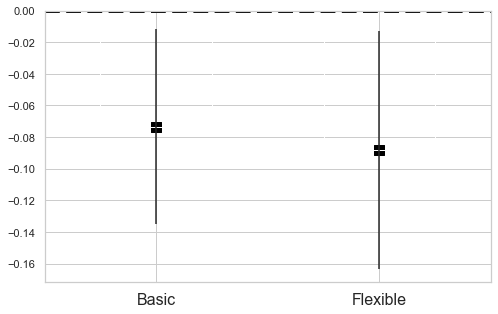

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Basic','Flexible'], 
                       rotation=0, fontsize=16)


# Try lasso next

In [35]:
# Import relevant packages for lasso 
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error  #MSE

In [36]:
# Get exogenous variables from flexible model
X = flex_results_0.exog #bc skitlearn cannot produce them in the regression
X.shape # the subsample data of the people who didnt go to college

(1376, 928)

In [37]:
# Set endogenous variable
lwage = data["lwage"]
lwage.shape

(1376,)

In [38]:
# (lambda penalty value)

alpha=0.1

In [39]:
# Set penalty value = 0.1
#reg = linear_model.Lasso(alpha=0.1/np.log(len(lwage)))

reg = linear_model.Lasso(alpha = alpha)

# LASSO regression for flexible model

lwage_lasso_fitted = reg.fit(X, lwage).predict( X )

# coefficients 
reg.coef_
print('Lasso Regression: R^2 score', reg.score(X, lwage))

Lasso Regression: R^2 score 0.13271492777145588


C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.09358067198997, tolerance: 0.0349503284207476
  model = cd_fast.enet_coordinate_descent(


In [40]:
# Check predicted values
lwage_lasso_fitted

array([2.82045944, 3.08162988, 2.83790948, ..., 2.73397764, 2.70741033,
       2.69495047])

Now, we can evaluate the performance of both models based on the (adjusted) $R^2_{sample}$ and the (adjusted) $MSE_{sample}$:

In [41]:
# Basic Model
basic = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2'
basic_results = smf.ols(basic , data=data).fit()

# Flexible model 
flex = 'lwage ~ sex + shs+hsg+scl+clg+occ2+ind2+mw+so+we + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'
flex_results = smf.ols(flex , data=data).fit()

In [42]:
# Assess the predictive performance
R2_1 = basic_results.rsquared
print("R-squared for the basic model: ", R2_1, "\n")
R2_adj1 = basic_results.rsquared_adj
print("adjusted R-squared for the basic model: ", R2_adj1, "\n")


R2_2 = flex_results.rsquared
print("R-squared for the flexible model: ", R2_2, "\n")
R2_adj2 = flex_results.rsquared_adj
print("adjusted R-squared for the flexible model: ", R2_adj2, "\n")

R2_L = reg.score(flex_results_0.exog, lwage)
print("R-squared for LASSO: ", R2_L, "\n")
R2_adjL = 1 - (1-R2_L)*(len(lwage)-1)/(len(lwage)-X.shape[1]-1)  # one more for intercetp
print("adjusted R-squared for LASSO: ", R2_adjL, "\n")

R-squared for the basic model:  0.18023814876721034 

adjusted R-squared for the basic model:  0.15122549288773657 

R-squared for the flexible model:  0.31019404037443443 

adjusted R-squared for the flexible model:  0.1773779752947504 

R-squared for LASSO:  0.13271492777145588 

adjusted R-squared for LASSO:  -1.6678232087567078 



In [43]:
# calculating the MSE
MSE1 =  np.mean(basic_results.resid**2)
print("MSE for the basic model: ", MSE1, "\n")
p1 = len(basic_results.params) # number of regressors
n = len(lwage)
MSE_adj1  = (n/(n-p1))*MSE1
print("adjusted MSE for the basic model: ", MSE_adj1, "\n")

MSE2 =  np.mean(flex_results.resid**2)
print("MSE for the flexible model: ", MSE2, "\n")
p2 = len(flex_results.params) # number of regressors
n = len(lwage)
MSE_adj2  = (n/(n-p2))*MSE2
print("adjusted MSE for the flexible model: ", MSE_adj2, "\n")


MSEL = mean_squared_error(lwage, lwage_lasso_fitted)
print("MSE for the LASSO model: ", MSEL, "\n")
pL = reg.coef_.shape[0] # number of regressors
n = len(lwage)
MSE_adjL  = (n/(n-pL))*MSEL
print("adjusted MSE for LASSO model: ", MSE_adjL, "\n")

MSE for the basic model:  0.20821908377460796 

adjusted MSE for the basic model:  0.21607048210698385 

MSE for the flexible model:  0.17521035490917466 

adjusted MSE for the flexible model:  0.212413610885484 

MSE for the LASSO model:  0.22028995718604233 

adjusted MSE for LASSO model:  0.6766048684999872 



In [44]:
pip install --user array_to_latex

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Package for latex table 
import array_to_latex as a2l

table = np.zeros((3, 5))
table[0,0:5] = [p1, R2_1, MSE1, R2_adj1, MSE_adj1]
table[1,0:5] = [p2, R2_2, MSE2, R2_adj2, MSE_adj2]
table[2,0:5] = [pL, R2_L, MSEL, R2_adjL, MSE_adjL]
table

array([[ 5.00000000e+01,  1.80238149e-01,  2.08219084e-01,
         1.51225493e-01,  2.16070482e-01],
       [ 2.41000000e+02,  3.10194040e-01,  1.75210355e-01,
         1.77377975e-01,  2.12413611e-01],
       [ 9.28000000e+02,  1.32714928e-01,  2.20289957e-01,
        -1.66782321e+00,  6.76604868e-01]])

In [46]:
table = pd.DataFrame(table, columns = ["p","$R^2_{sample}$","$MSE_{sample}$","$R^2_{adjusted}$", "$MSE_{adjusted}$"], \
                      index = ["basic reg","flexible reg", "lasso flex"])
table

,p,$R^2_{sample}$,$MSE_{sample}$,$R^2_{adjusted}$,$MSE_{adjusted}$
basic reg,50.0,0.180238,0.208219,0.151225,0.216070
flexible reg,241.0,0.310194,0.175210,0.177378,0.212414
lasso flex,928.0,0.132715,0.220290,-1.667823,0.676605


Considering all measures above, the flexible model performs slightly better than the basic model. 

One procedure to circumvent this issue is to use **data splitting** that is described and applied in the following.

## Data Splitting

Measure the prediction quality of the two models via data splitting:

- Randomly split the data into one training sample and one testing sample. Here we just use a simple method (stratified splitting is a more sophisticated version of splitting that we can consider).
- Use the training sample for estimating the parameters of the Basic Model and the Flexible Model.
- Use the testing sample for evaluation. Predict the $\mathtt{wage}$  of every observation in the testing sample based on the estimated parameters in the training sample.
- Calculate the Mean Squared Prediction Error $MSE_{test}$ based on the testing sample for both prediction models. 

In [47]:
# Import relevant packages for splitting data
import random
import math

# Set Seed
# to make the results replicable (generating random numbers)
np.random.seed(0)
random = np.random.randint(0,n, size=math.floor(n))
data["random"] = random
random    # the array does not change 

C:\Users\ANA\AppData\Local\Temp/ipykernel_15812/493912399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["random"] = random


array([ 684,  559, 1216, ..., 1294,  573, 1367])

In [48]:
data_2 = data.sort_values(by=['random'])
data_2.head()

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,exp3,exp4,occ,occ2,ind,ind2,sexo,place,educ,random
1641,9262,9.134615,2.212071,0.0,some high school,1.0,0.0,0.0,0.0,1.0,...,0.125,0.0625,9360.0,22,5090.0,9,male,Midwest,NaN,0
2438,14134,24.038462,3.179655,0.0,some high school,1.0,0.0,0.0,0.0,1.0,...,1.331,1.4641,4250.0,14,7770.0,16,male,Midwest,NaN,0
1559,8689,12.980769,2.563469,1.0,some high school,1.0,0.0,0.0,0.0,1.0,...,4.913,8.3521,5620.0,17,5380.0,9,female,Midwest,NaN,3
1983,11486,12.980769,2.563469,0.0,some high school,1.0,0.0,0.0,0.0,1.0,...,0.343,0.2401,4760.0,16,5790.0,9,male,Midwest,NaN,3
3478,20866,34.615385,3.544298,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,0.125,0.0625,220.0,1,770.0,4,male,South,NaN,3


In [49]:
# Create training and testing sample 
train = data_2[ : math.floor(n*4/5)]    # training sample
test =  data_2[ math.floor(n*4/5) : ]   # testing sample
print(train.shape)
print(test.shape)

(1100, 25)
(276, 25)


In [50]:
# Basic Model
basic = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2'
basic_results = smf.ols(basic , data=data).fit()

# Flexible model 
flex = 'lwage ~ sex + shs+hsg+scl+clg+occ2+ind2+mw+so+we + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'
flex_results = smf.ols(flex , data=data).fit()

In [51]:
# basic model
# estimating the parameters in the training sample
basic_results = smf.ols(basic , data=train).fit()
print(basic_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     5.265
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.13e-25
Time:                        13:49:08   Log-Likelihood:                -711.67
No. Observations:                1100   AIC:                             1519.
Df Residuals:                    1052   BIC:                             1759.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8380      0.156     18.139      0.0

In [52]:
lwage_test = test["lwage"].values
#test

In [53]:
# calculating the out-of-sample MSE
test = sm.add_constant(test)   #add constant 

lwage_pred =  basic_results.predict(test) # predict out of sample
#print(lwage_pred)

C:\Users\ANA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [54]:
MSE_test1 = np.sum((lwage_test-lwage_pred)**2)/len(lwage_test)
R2_test1  = 1 - MSE_test1/np.var(lwage_test)

print("Test MSE for the basic model: ", MSE_test1, " ")
print("Test R2 for the basic model: ", R2_test1)

Test MSE for the basic model:  0.19987102511489763  
Test R2 for the basic model:  0.04156410192334481


In the basic model, the $MSE_{test}$ is quite closed to the $MSE_{sample}$.

In [56]:
# Flexible model
# estimating the parameters in the training sample
flex_results = smf.ols(flex , data=train).fit()

# calculating the out-of-sample MSE
lwage_flex_pred =  flex_results.predict(test) # predict out of sample
lwage_test = test["lwage"].values

MSE_test2 = np.sum((lwage_test-lwage_flex_pred)**2)/len(lwage_test)
R2_test2  = 1 - MSE_test2/np.var(lwage_test)

print("Test MSE for the flexible model: ", MSE_test2, " ")
print("Test R2 for the flexible model: ", R2_test2)

Test MSE for the flexible model:  144.64134533300265  
Test R2 for the flexible model:  -692.594569966105


In the flexible model, the discrepancy between the $MSE_{test}$ and the $MSE_{sample}$ is not large.

It is worth to notice that the $MSE_{test}$ vary across different data splits. Hence, it is a good idea average the out-of-sample MSE over different data splits to get valid results.

Nevertheless, we observe that, based on the out-of-sample $MSE$, the basic model using ols regression performs is about as well (or slightly better) than the flexible model. 


Next, let us use lasso regression in the flexible model instead of ols regression. Lasso (*least absolute shrinkage and selection operator*) is a penalized regression method that can be used to reduce the complexity of a regression model when the number of regressors $p$ is relatively large in relation to $n$. 

Note that the out-of-sample $MSE$ on the test sample can be computed for any other black-box prediction method as well. Thus, let us finally compare the performance of lasso regression in the flexible model to ols regression.

In [57]:
# flexible model using lasso
# get exogenous variables from training data used in flex model
flex_results_0 = smf.ols(flex , data=train)
X_train = flex_results_0.exog
print(X_train.shape)

# Get endogenous variable 
lwage_train = train["lwage"]
print(lwage_train.shape)

(1100, 241)
(1100,)


In [58]:
# flexible model using lasso
# get exogenous variables from testing data used in flex model
flex_results_1 = smf.ols(flex , data=test)
X_test = flex_results_1.exog
print(X_test.shape)

# Get endogenous variable 
lwage_test = test["lwage"]
print(lwage_test.shape)

(276, 241)
(276,)


In [59]:
# calculating the out-of-sample MSE
reg = linear_model.Lasso(alpha=0.1)
lwage_lasso_fitted = reg.fit(X_train, lwage_train).predict( X_test )

MSE_lasso = np.sum((lwage_test-lwage_lasso_fitted)**2)/len(lwage_test)
R2_lasso  = 1 - MSE_lasso/np.var(lwage_test)

print("Test MSE for the flexible model: ", MSE_lasso, " ")
print("Test R2 for the flexible model: ", R2_lasso)

Test MSE for the flexible model:  0.19367119049793172  
Test R2 for the flexible model:  0.0712939942657822


In [60]:
# Package for latex table 
import array_to_latex as a2l

table2 = np.zeros((3, 2))
table2[0,0] = MSE_test1
table2[1,0] = MSE_test2
table2[2,0] = MSE_lasso
table2[0,1] = R2_test1
table2[1,1] = R2_test2
table2[2,1] = R2_lasso

table2 = pd.DataFrame(table2, columns = ["$MSE_{test}$", "$R^2_{test}$"], \
                      index = ["basic reg","flexible reg","lasso regression"])
table2

,$MSE_{test}$,$R^2_{test}$
basic reg,0.199871,0.041564
flexible reg,144.641345,-692.594570
lasso regression,0.193671,0.071294


In [61]:
table2.to_latex
print(table2.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  \$MSE\_\{test\}\$ &  \$R\textasciicircum 2\_\{test\}\$ \\
\midrule
basic reg        &      0.199871 &      0.041564 \\
flexible reg     &    144.641345 &   -692.594570 \\
lasso regression &      0.193671 &      0.071294 \\
\bottomrule
\end{tabular}



# Two cases of Partialling-Out using lasso.

### Case 1: Matrix W = 'exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2'

In [62]:
# import packages
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [63]:
# model for Y
flex_y = 'lwage ~  exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2'

# model for D
flex_d = 'sex ~ exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2'

In [64]:
from sklearn import linear_model
# flex_y

#define the lasso model
lasso_model = linear_model.Lasso( alpha = 0.5 )

#extract the covariable to use
flex_y_covariables = smf.ols(formula = flex_y, data = data)

#fit hte model and predict the value of the outcome
Y_lasso_fitted = lasso_model.fit( flex_y_covariables.exog, data[[ 'lwage' ]] ).predict( flex_y_covariables.exog )

#save the residuals
t_Y = data[[ 'lwage' ]] - Y_lasso_fitted.reshape( Y_lasso_fitted.size, 1)

In [65]:
# extraflex_d

#extract the covariable to use
flex_d_covariables = smf.ols( flex_d, data=data)

#fit hte model and predict the value of the outcome
D_lasso_fitted = lasso_model.fit( flex_d_covariables.exog, data[[ 'sex' ]] ).predict( flex_d_covariables.exog )

#save the residuals
t_D = data[[ 'sex' ]] - D_lasso_fitted.reshape( D_lasso_fitted.size, 1)

In [66]:
#create a data frame with the residuals of both the regressions
data_res = pd.DataFrame( np.hstack(( t_Y , t_D )) , columns = [ 't_Y', 't_D' ] )

# regression of the residuals Y on D after partialling-out the effect of W
partial_lasso_fit = smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['t_D']

print( f"Coefficient for D via partialling-out using lasso {partial_lasso_est}" )

# standard error
HCV_coefs = partial_lasso_fit.cov_HC0
partial_lasso_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

Coefficient for D via partialling-out using lasso -0.12148020376235968


The use of the lasso for partialling-out the basic regressions shows us that the gender gap is of $12.14\%$ , which is different from the $7\%$ gap found int the basic regression using OLS. This can be explained by the fact that lasso supresses some of the regressors but not all of them, and because partialling out controls for the covariates in the both regressions.

Next we try "extra" flexible model, where we take interactions of all controls, giving us about 1000 controls.

### Case 2: Partialling-Out using lasso 2 : Matrix W = (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)**2'

In [67]:
# model for Y
flex_y = 'lwage ~  X'

# model for D
flex_d = 'sex ~ X'

In [68]:
from sklearn import linear_model
# flex_y

#define the lasso model
lasso_model = linear_model.Lasso( alpha = 0.5 )

#extract the covariable to use
flex_y_covariables = smf.ols(formula = flex_y, data = data)

#fit hte model and predict the value of the outcome
Y_lasso_fitted = lasso_model.fit( flex_y_covariables.exog, data[[ 'lwage' ]] ).predict( flex_y_covariables.exog )

#save the residuals
t_Y = data[[ 'lwage' ]] -  Y_lasso_fitted.reshape( Y_lasso_fitted.size, 1) 

In [69]:
# extraflex_d

#extract the covariable to use
flex_d_covariables = smf.ols( flex_d, data=data)

#fit hte model and predict the value of the outcome
D_lasso_fitted = lasso_model.fit( flex_d_covariables.exog, data[[ 'sex' ]] ).predict( flex_d_covariables.exog )

#save the residuals
t_D = data[[ 'sex' ]] - D_lasso_fitted.reshape( D_lasso_fitted.size, 1)

In [70]:
#create a data frame with the residuals of both the regressions
data_res = pd.DataFrame( np.hstack(( t_Y , t_D )) , columns = [ 't_Y', 't_D' ] )

# regression of the residuals Y on D after partialling-out the effect of W
partial_lasso_fit = smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['t_D']

print( f"Coefficient for D via partialling-out using lasso {partial_lasso_est}" )

# standard error
HCV_coefs = partial_lasso_fit.cov_HC0
partial_lasso_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

Coefficient for D via partialling-out using lasso -0.1139320522136372


The use of the lasso for partialling-out the basic regressions shows us that the gender gap is of $11.4\%$ , which is different from the $7\%$ gap found int the basic regression using OLS but pretty similar to the $ found on the basic regression model with partialling-out. Above the possible reasons already mentioned, in this flexible model we have more regressors but also controlled by the penalty value .